In [ ]:
import numpy as np
import keras
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import datasets
import pandas as pd


**MNIST**

In [ ]:
mnist = keras.datasets.mnist.load_data()
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
mnist

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

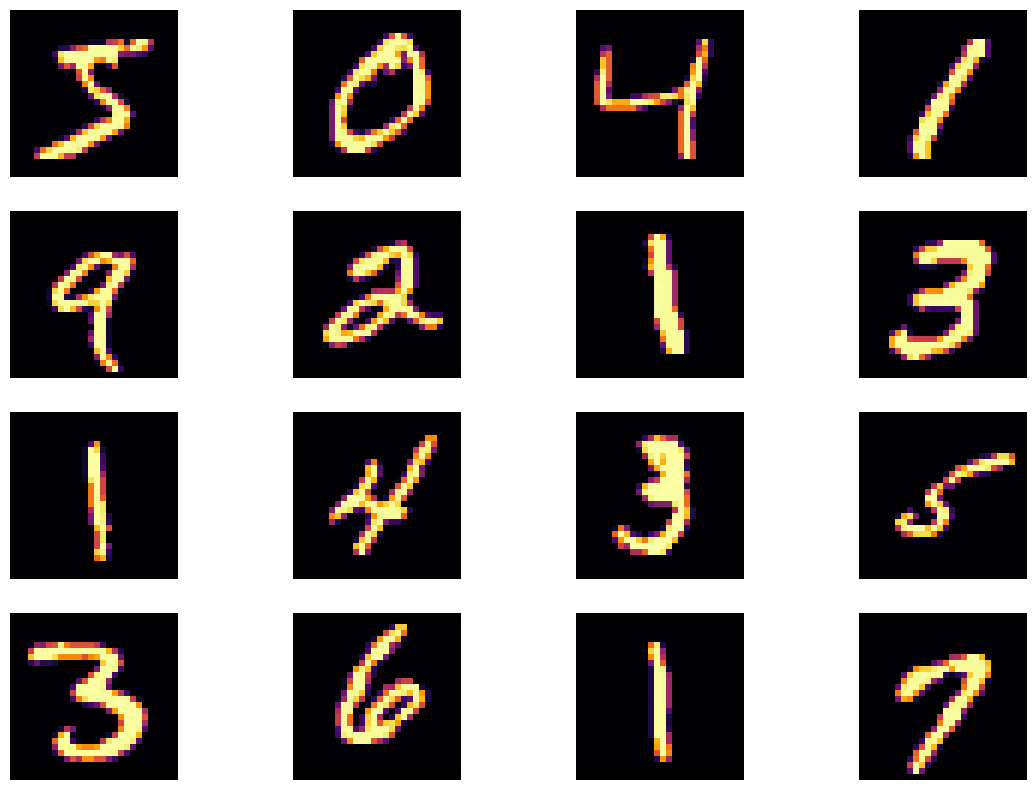

In [ ]:
plt.figure(figsize=(14, 10))
for i in range(16):
  plt.subplot(4, 4, i + 1)
  plt.imshow(x_train[i], cmap='inferno')
  plt.axis('off')
plt.show()

Предобработка

In [ ]:
x_train = x_train.astype('float32')
x_train = x_train.reshape(x_train.shape[0], 1, 28, 28)

x_test = x_test.astype('float32')
x_test = x_test.reshape(x_test.shape[0], 1, 28, 28)

y_train_categ = keras.utils.to_categorical(y_train, 10)
y_test_categ = keras.utils.to_categorical(y_test, 10)

Создаём сеть

In [ ]:
model=keras.Sequential([
                      keras.layers.InputLayer(input_shape=(1, 28, 28)),
                      keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
                      keras.layers.MaxPooling2D((2, 2), padding='same'),
                      keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
                      keras.layers.MaxPooling2D((2, 2), padding='same'),
                      keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
                      keras.layers.MaxPooling2D((2, 2), padding='same'),
                      keras.layers.Flatten(),
                      keras.layers.Dense(128, activation='relu'),
                      keras.layers.Dense(64, activation='relu'),
                      keras.layers.Dense(10, activation='softmax')
                        ])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 1, 28, 32)         8096      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 1, 14, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 1, 14, 64)         18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 1, 7, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 1, 7, 128)         73856     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 1, 4, 128)        

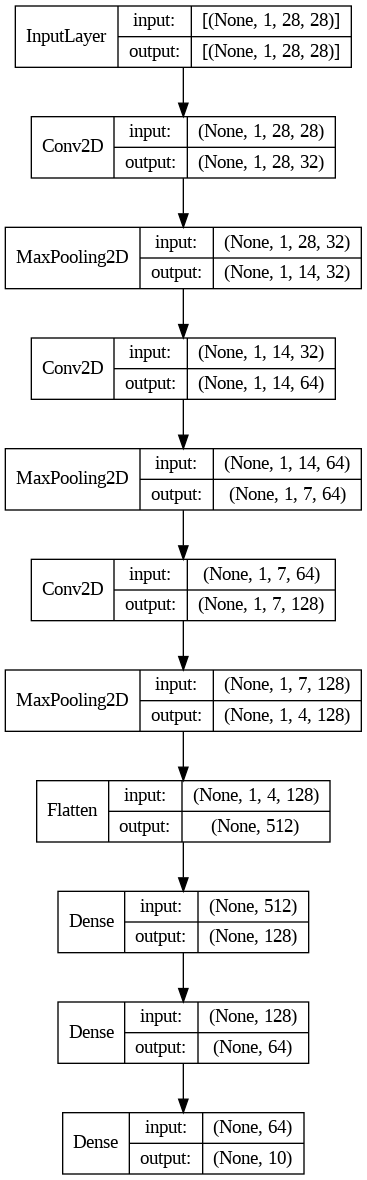

In [ ]:
keras.utils.plot_model(model, expand_nested=True, show_shapes=True, show_layer_names=False)

In [ ]:
model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history=model.fit(x_train,y_train_categ,
          batch_size=128,
          epochs=10,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 14s 35ms/step - loss: 0.4092 - accuracy: 0.8904 - val_loss: 0.1400 - val_accuracy: 0.9597
Epoch 2/10
375/375 [==============================] - 12s 32ms/step - loss: 0.0983 - accuracy: 0.9707 - val_loss: 0.0926 - val_accuracy: 0.9729
Epoch 3/10
375/375 [==============================] - 12s 33ms/step - loss: 0.0667 - accuracy: 0.9795 - val_loss: 0.0785 - val_accuracy: 0.9797
Epoch 4/10
375/375 [==============================] - 13s 36ms/step - loss: 0.0560 - accuracy: 0.9832 - val_loss: 0.0885 - val_accuracy: 0.9781
Epoch 5/10
375/375 [==============================] - 13s 36ms/step - loss: 0.0493 - accuracy: 0.9852 - val_loss: 0.0805 - val_accuracy: 0.9784
Epoch 6/10
375/375 [==============================] - 13s 36ms/step - loss: 0.0404 - accuracy: 0.9882 - val_loss: 0.1044 - val_accuracy: 0.9718
Epoch 7/10
375/375 [==============================] - 13s 35ms/step - loss: 0.0378 - accuracy: 0.9894 - val_loss: 0.0827 - val_accuracy:

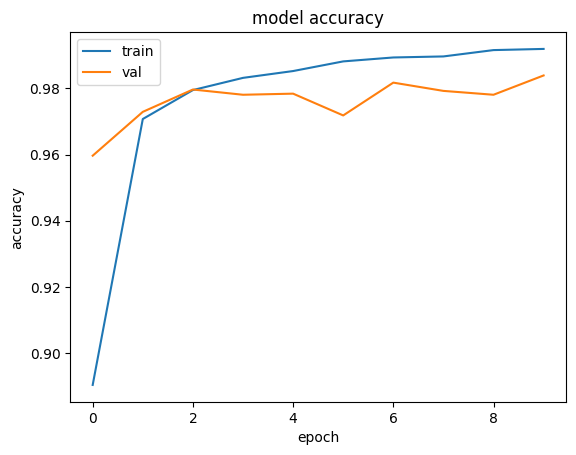

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

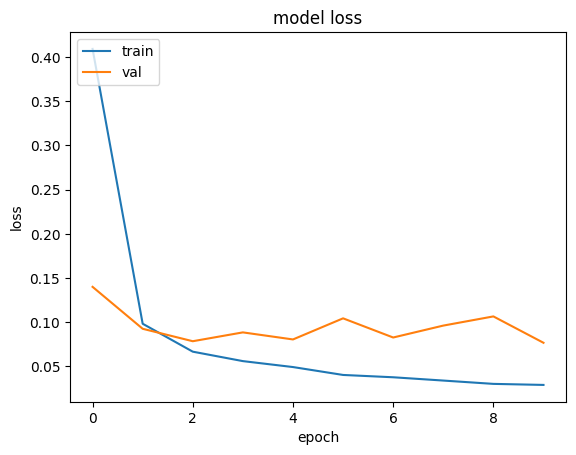

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
test_loss,test_acc=model.evaluate(x_test,y_test_categ)

313/313 [==============================] - 2s 7ms/step - loss: 0.0685 - accuracy: 0.9855


In [ ]:
prediction1=model.predict(x_test)
prediction1

313/313 [==============================] - 1s 4ms/step


array([[8.57752464e-18, 2.81661414e-08, 1.38052333e-10, ...,
        9.99999940e-01, 9.97402641e-14, 4.99547669e-13],
       [8.47728308e-30, 8.34917789e-20, 9.99999940e-01, ...,
        9.20455526e-25, 3.72810980e-25, 8.67959187e-26],
       [2.63829703e-17, 9.99999940e-01, 9.50866812e-17, ...,
        1.03600320e-14, 2.86792146e-10, 2.40256449e-16],
       ...,
       [1.67720343e-30, 3.10180714e-22, 2.04534479e-34, ...,
        1.10460915e-29, 3.55889549e-24, 4.92545391e-17],
       [9.42050325e-14, 7.25666414e-16, 3.43628404e-19, ...,
        1.07919541e-16, 1.35778828e-06, 8.19750951e-12],
       [1.34745885e-17, 1.52237795e-21, 6.37928637e-18, ...,
        4.85237664e-28, 2.71366840e-17, 3.74885322e-21]], dtype=float32)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report

Постройте матрицу ошибок, выведите значения метрик

In [ ]:
pred1_argmax = np.argmax(prediction1, axis=1)
pd.crosstab(y_test, pred1_argmax)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,975,0,0,0,0,1,1,1,2,0
1,0,1129,2,2,0,0,0,0,2,0
2,1,0,1023,2,1,0,0,5,0,0
3,0,0,3,994,0,5,0,2,4,2
4,1,0,1,0,967,0,0,2,1,10
5,1,0,0,13,0,869,1,1,6,1
6,3,3,0,1,3,3,941,0,4,0
7,0,1,6,1,0,0,0,1014,1,5
8,3,0,3,2,1,2,1,1,961,0


In [ ]:
print('Accuracy: ', accuracy_score(y_test, pred1_argmax))
print('\n', classification_report(y_test, pred1_argmax))

Accuracy:  0.9855

               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.98      0.99      0.99      1032
           3       0.98      0.98      0.98      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.97      0.98       892
           6       1.00      0.98      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.97      0.99      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



**Fasion MNIST**

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


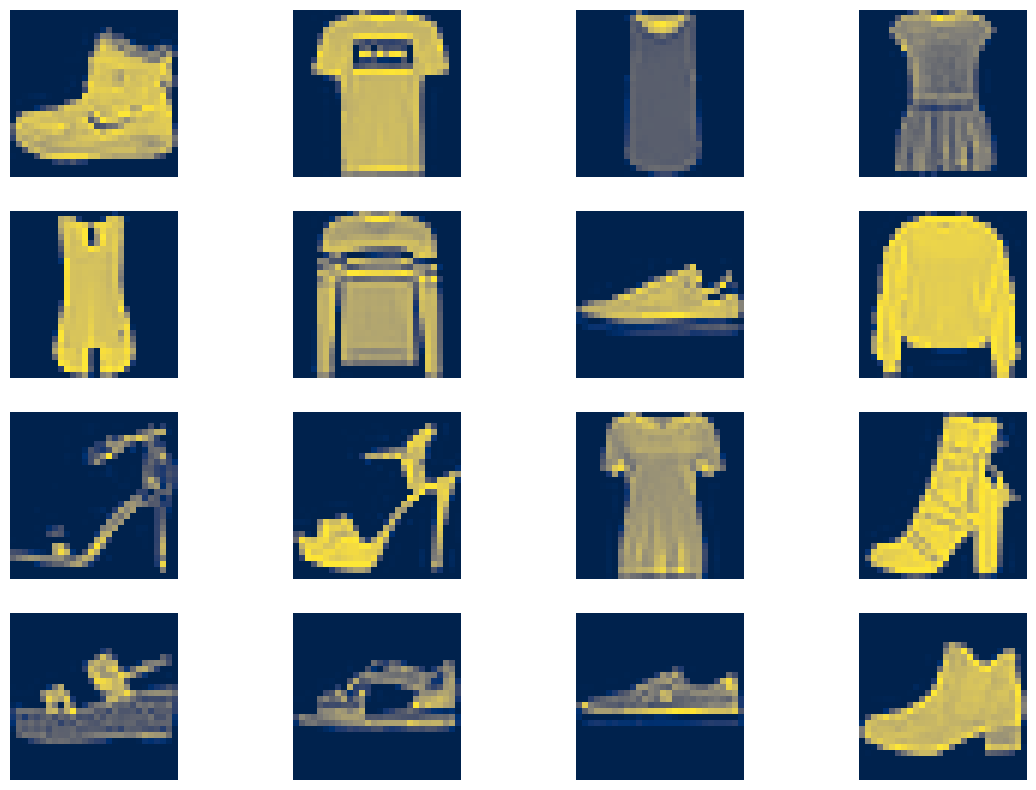

In [ ]:
plt.figure(figsize=(14, 10))
for i in range(16):
  plt.subplot(4, 4, i + 1)
  plt.imshow(x_train[i], cmap='cividis')
  plt.axis('off')
plt.show()

In [ ]:
x_train = x_train.astype('float32')
x_train = x_train.reshape(x_train.shape[0], 1, 28, 28)

x_test = x_test.astype('float32')
x_test = x_test.reshape(x_test.shape[0], 1, 28, 28)

y_train_categ = keras.utils.to_categorical(y_train, 10)
y_test_categ = keras.utils.to_categorical(y_test, 10)

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 1, 28, 32)         8096      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 1, 14, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 1, 14, 64)         18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 1, 7, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 1, 7, 128)         73856     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 1, 4, 128)        

In [ ]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history2=model.fit(x_train,y_train_categ,
          batch_size=128,
          epochs=10,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 14s 35ms/step - loss: 0.5924 - accuracy: 0.7980 - val_loss: 0.4081 - val_accuracy: 0.8526
Epoch 2/10
375/375 [==============================] - 14s 37ms/step - loss: 0.3585 - accuracy: 0.8666 - val_loss: 0.3469 - val_accuracy: 0.8733
Epoch 3/10
375/375 [==============================] - 14s 38ms/step - loss: 0.3128 - accuracy: 0.8833 - val_loss: 0.3446 - val_accuracy: 0.8776
Epoch 4/10
375/375 [==============================] - 13s 34ms/step - loss: 0.2894 - accuracy: 0.8907 - val_loss: 0.3416 - val_accuracy: 0.8782
Epoch 5/10
375/375 [==============================] - 12s 32ms/step - loss: 0.2692 - accuracy: 0.8988 - val_loss: 0.3275 - val_accuracy: 0.8840
Epoch 6/10
375/375 [==============================] - 13s 33ms/step - loss: 0.2529 - accuracy: 0.9035 - val_loss: 0.3272 - val_accuracy: 0.8843
Epoch 7/10
375/375 [==============================] - 13s 35ms/step - loss: 0.2398 - accuracy: 0.9101 - val_loss: 0.3150 - val_accuracy:

Попробуйте другие параметры оптимизаторов, метрик, других структур сетей

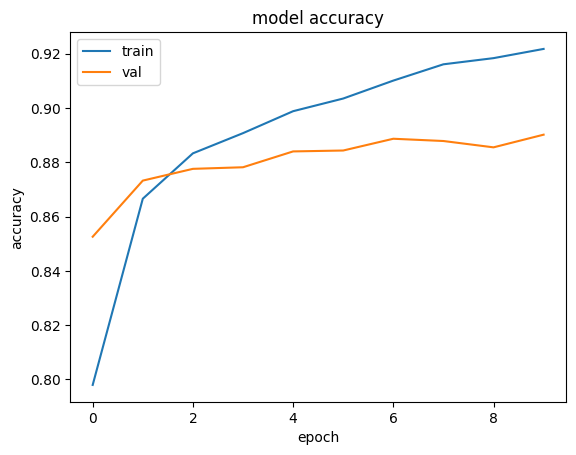

In [ ]:
# summarize history for accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

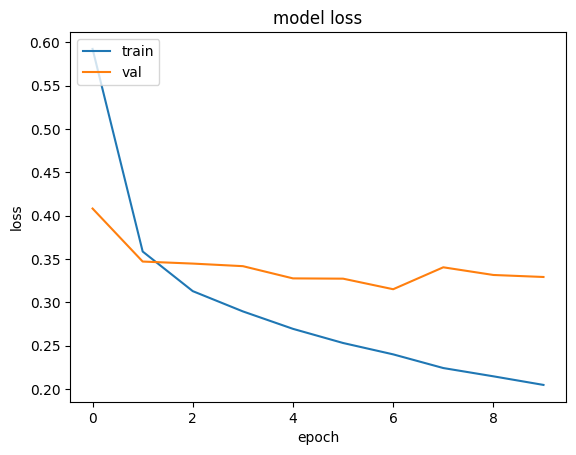

In [ ]:
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
test_loss2,test_acc2=model.evaluate(x_test,y_test_categ)

313/313 [==============================] - 1s 4ms/step - loss: 0.3525 - accuracy: 0.8854


In [ ]:
prediction2=model.predict(x_test)
prediction2

313/313 [==============================] - 2s 6ms/step


array([[9.6404249e-14, 1.0011009e-12, 5.4694109e-12, ..., 5.4069032e-04,
        8.5915715e-08, 9.9945867e-01],
       [8.7971898e-08, 4.7611464e-13, 9.9979186e-01, ..., 5.4548154e-11,
        2.9459741e-09, 1.2949418e-09],
       [1.4523942e-25, 9.9999994e-01, 1.1566926e-23, ..., 0.0000000e+00,
        1.9975613e-26, 4.0523212e-34],
       ...,
       [5.7676491e-10, 4.9193676e-18, 4.4119101e-12, ..., 1.1566728e-19,
        9.9999994e-01, 6.3426801e-15],
       [4.5341132e-14, 9.9999994e-01, 1.9298209e-14, ..., 5.2851522e-23,
        3.9364983e-17, 1.0612122e-19],
       [1.3221468e-02, 1.7813806e-03, 4.3108608e-04, ..., 2.2039405e-01,
        5.6369426e-03, 2.2298507e-02]], dtype=float32)

In [ ]:
pred2_argmax = np.argmax(prediction2, axis=1)
pd.crosstab(y_test, pred2_argmax)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,763,11,16,19,2,3,177,0,9,0
1,2,983,2,8,1,0,4,0,0,0
2,10,3,800,6,108,0,68,0,5,0
3,14,12,9,892,19,0,47,0,7,0
4,1,1,68,42,837,0,50,0,1,0
5,1,0,0,1,0,957,1,31,4,5
6,86,6,74,23,86,0,714,0,11,0
7,0,0,0,0,0,8,0,979,0,13
8,1,0,4,1,1,1,5,1,986,0


In [ ]:
print('Accuracy: ', accuracy_score(y_test, pred2_argmax))
print('\n', classification_report(y_test, pred2_argmax))

Accuracy:  0.8854

               precision    recall  f1-score   support

           0       0.87      0.76      0.81      1000
           1       0.97      0.98      0.97      1000
           2       0.82      0.80      0.81      1000
           3       0.90      0.89      0.90      1000
           4       0.79      0.84      0.81      1000
           5       0.98      0.96      0.97      1000
           6       0.67      0.71      0.69      1000
           7       0.93      0.98      0.95      1000
           8       0.96      0.99      0.97      1000
           9       0.98      0.94      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



**CIFAR10**

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

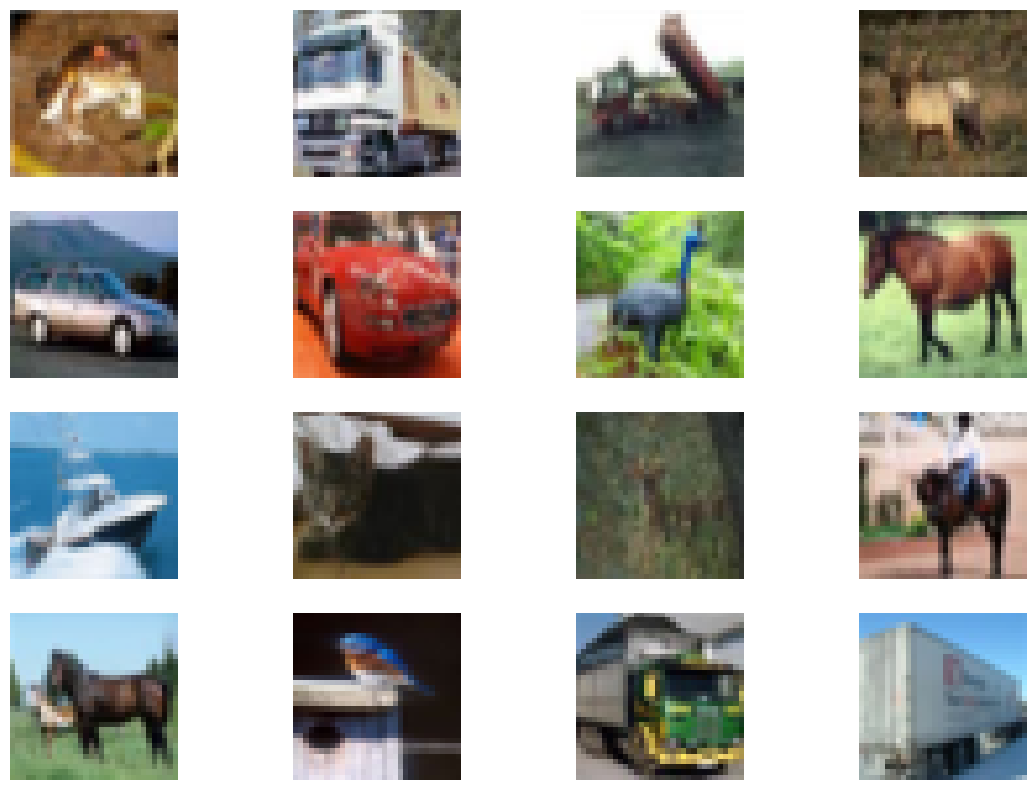

In [ ]:
plt.figure(figsize=(14, 10))
for i in range(16):
  plt.subplot(4, 4, i + 1)
  plt.imshow(x_train[i])
  plt.axis('off')
plt.show()

In [ ]:
x_train = x_train.astype('float32')
x_train = x_train.reshape(x_train.shape[0], 3, 32, 32)

x_test = x_test.astype('float32')
x_test = x_test.reshape(x_test.shape[0], 3, 32, 32)

y_train_categ = keras.utils.to_categorical(y_train, 10)
y_test_categ = keras.utils.to_categorical(y_test, 10)

In [ ]:
model2=keras.Sequential([
                      keras.layers.InputLayer(input_shape=(3, 32, 32)),
                      keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
                      keras.layers.MaxPooling2D((2, 2), padding='same'),
                      keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
                      keras.layers.MaxPooling2D((2, 2), padding='same'),
                      keras.layers.Dropout(0.3),
                      keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
                      keras.layers.MaxPooling2D((2, 2), padding='same'),
                      keras.layers.Flatten(),
                      keras.layers.Dense(256, activation='relu'),
                      keras.layers.Dense(128, activation='relu'),
                      keras.layers.Dense(10, activation='softmax')
                        ])

In [ ]:
model2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 3, 32, 128)        36992     
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 2, 16, 128)        0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 2, 16, 256)        295168    
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 1, 8, 256)         0         
 ng2D)                                                           
                                                                 
 dropout (Dropout)           (None, 1, 8, 256)         0         
                                                                 
 conv2d_26 (Conv2D)          (None, 1, 8, 256)        

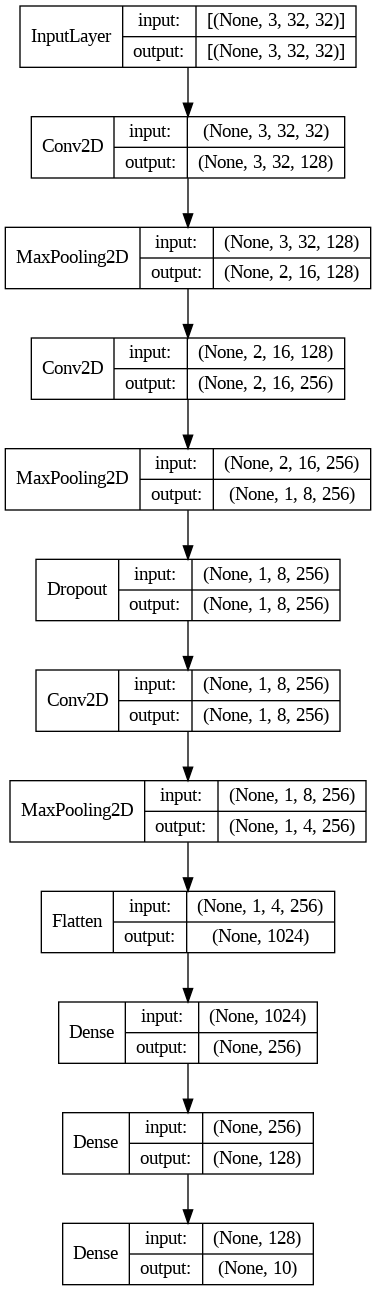

In [ ]:
keras.utils.plot_model(model2, expand_nested=True, show_shapes=True, show_layer_names=False)

In [ ]:
model2.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history3=model2.fit(x_train,y_train_categ,
          batch_size=128,
          epochs=10,
          validation_split=0.2)

Epoch 1/10
313/313 [==============================] - 154s 488ms/step - loss: 2.9672 - accuracy: 0.2723 - val_loss: 1.7820 - val_accuracy: 0.3644
Epoch 2/10
313/313 [==============================] - 150s 480ms/step - loss: 1.7265 - accuracy: 0.3790 - val_loss: 1.6952 - val_accuracy: 0.3934
Epoch 3/10
313/313 [==============================] - 155s 494ms/step - loss: 1.6345 - accuracy: 0.4134 - val_loss: 1.5936 - val_accuracy: 0.4357
Epoch 4/10
313/313 [==============================] - 151s 482ms/step - loss: 1.5763 - accuracy: 0.4342 - val_loss: 1.6105 - val_accuracy: 0.4232
Epoch 5/10
313/313 [==============================] - 147s 469ms/step - loss: 1.5307 - accuracy: 0.4499 - val_loss: 1.5255 - val_accuracy: 0.4474
Epoch 6/10
313/313 [==============================] - 151s 481ms/step - loss: 1.4956 - accuracy: 0.4640 - val_loss: 1.5160 - val_accuracy: 0.4523
Epoch 7/10
313/313 [==============================] - 153s 489ms/step - loss: 1.4761 - accuracy: 0.4710 - val_loss: 1.5016 -

Попробуйте другие параметры оптимизаторов, метрик, других структур сетей

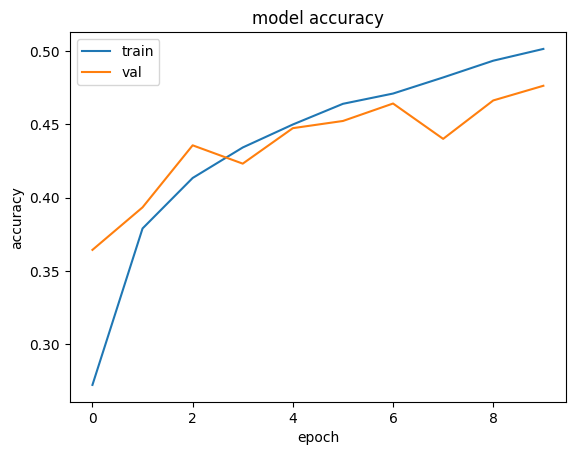

In [ ]:
# summarize history for accuracy
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

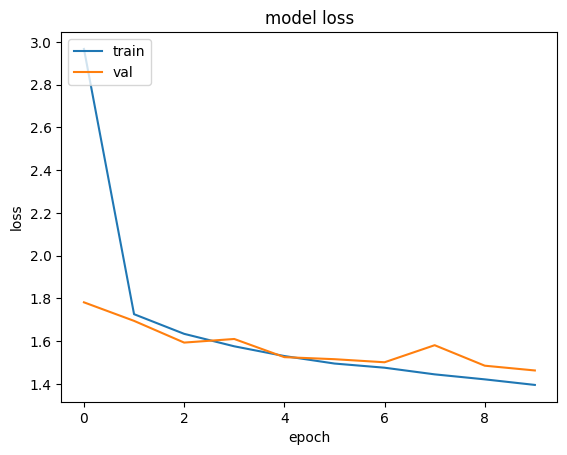

In [ ]:
# summarize history for loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
test_loss3,test_acc3=model2.evaluate(x_test,y_test_categ)

313/313 [==============================] - 9s 30ms/step - loss: 1.4500 - accuracy: 0.4795


In [ ]:
prediction3=model2.predict(x_test)
prediction3

313/313 [==============================] - 9s 30ms/step


array([[2.9779655e-01, 1.3425191e-02, 1.7882926e-02, ..., 3.1815744e-03,
        2.2035606e-01, 2.1944018e-03],
       [2.0024909e-02, 2.4478903e-01, 3.9556772e-03, ..., 4.4369718e-04,
        4.9096486e-01, 2.3313919e-01],
       [8.6348109e-02, 1.5542823e-01, 7.8999234e-04, ..., 4.1501694e-03,
        6.8849218e-01, 6.2148008e-02],
       ...,
       [5.0005945e-03, 4.2047008e-04, 8.0002286e-02, ..., 2.4169359e-02,
        3.4355000e-03, 3.5731657e-03],
       [1.3473680e-02, 8.4550930e-03, 1.8402834e-01, ..., 1.2032343e-01,
        3.8348620e-03, 2.2360608e-02],
       [3.3397004e-02, 2.1315191e-03, 2.1467102e-01, ..., 3.8368809e-01,
        3.3406669e-04, 2.7123200e-02]], dtype=float32)

In [ ]:
pred3_argmax = np.argmax(prediction3, axis=1)
pd.crosstab(y_test.flatten(), pred3_argmax)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,505,30,114,12,11,16,32,35,188,57
1,68,571,6,14,2,17,9,17,93,203
2,57,29,451,64,70,73,121,56,45,34
3,44,20,124,174,25,257,183,77,44,52
4,65,9,288,35,279,44,139,89,35,17
5,27,6,147,107,29,388,133,84,47,32
6,11,14,160,38,56,59,585,33,20,24
7,54,10,78,46,64,72,49,542,25,60
8,88,46,25,7,11,12,8,18,723,62


In [ ]:
print('Accuracy: ', accuracy_score(y_test, pred3_argmax))
print('\n', classification_report(y_test, pred3_argmax))

Accuracy:  0.4795

               precision    recall  f1-score   support

           0       0.52      0.51      0.51      1000
           1       0.64      0.57      0.60      1000
           2       0.32      0.45      0.37      1000
           3       0.34      0.17      0.23      1000
           4       0.51      0.28      0.36      1000
           5       0.40      0.39      0.40      1000
           6       0.46      0.58      0.51      1000
           7       0.55      0.54      0.54      1000
           8       0.56      0.72      0.63      1000
           9       0.52      0.58      0.54      1000

    accuracy                           0.48     10000
   macro avg       0.48      0.48      0.47     10000
weighted avg       0.48      0.48      0.47     10000

